# Import library

In [73]:
#untuk pemproses data
import pandas as pd
import numpy as np

#untuk keperluan plotting
import matplotlib.pyplot as plt
import seaborn as sns

#untuk membuat wordclound
from wordcloud import WordCloud

# Membaca Dataset

In [74]:
# membuat variabel untuk format non standard missing values
missing_values = ['n/a', 'na', "--", "?", "NA"]

In [75]:

# membaca dataset serta deteksi non standard missing values
df_loa_sample = pd.read_csv('../input/london-crime/london_crime_by_lsoa.csv',
                     na_values=missing_values)


In [76]:
# tampilkan dataset
df_loa_sample

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


Terdapat 13490604 baris × 7 kolom

# Mengubah nama kolom

In [77]:
df_loa_sample = df_loa_sample.rename(
    columns={
        'lsoa_code': 'Kode Area',
        'borough': 'Wilayah',
        'major_category': 'Kejahatan Mayor',
        'minor_category': 'Kejahatan Minor',
        'value': 'Jumlah Kasus',
        'year': 'Tahun',
        'month': 'Bulan'
    },
)

# Analisis

## Menyiapkan variabel global untuk keperluan nantinya

In [79]:
# Menampilkan sample 15 data pertama
df_loa_sample.head(16)

,Kode Area,Wilayah,Kejahatan Mayor,Kejahatan Minor,Jumlah Kasus,Tahun,Bulan
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [108]:
# menyiapkan list 'Tahun' untuk keperluan berikutnya
years = list(np.sort(df_loa_sample['Tahun'].unique()))

# menyiapkan list 'Wilayah' untuk keperluan berikutnya
boroughs = list(df_loa_sample['Wilayah'].unique())


# menyiapkan list 'Kejahatan Mayor' untuk keperluan berikutnya
major_categories = list(df_loa_sample['Kejahatan Mayor'].unique())

# menyiapkan list 'Kejahatan Minor' untuk keperluan berikutnya
minor_categories = list(df_loa_sample['Kejahatan Minor'].unique())

# Menyiapkan color_list untuk kebutuhan visualisasi grafik
colors_list = ['darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna']

# Menyiapkan range list untuk months
months = list(range(1,13))

## Mengetahui Missing Values yang terdapat pada data

In [82]:
columns = df_loa_sample.columns
for col in columns:
    print('Jumlah Standard Missing Values Pada Kolom {} adalah {}'.format(
        col, df_loa_sample[col].isnull().sum()))

Jumlah Standard Missing Values Pada Kolom Kode Area adalah 0
Jumlah Standard Missing Values Pada Kolom Wilayah adalah 0
Jumlah Standard Missing Values Pada Kolom Kejahatan Mayor adalah 0
Jumlah Standard Missing Values Pada Kolom Kejahatan Minor adalah 0
Jumlah Standard Missing Values Pada Kolom Jumlah Kasus adalah 0
Jumlah Standard Missing Values Pada Kolom Tahun adalah 0
Jumlah Standard Missing Values Pada Kolom Bulan adalah 0


## Mengetahui apakah tipe data setiap atribut sudah sesuai atau belum (Unexpected Missing Values)

In [83]:
df_loa_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Kode Area        object
 1   Wilayah          object
 2   Kejahatan Mayor  object
 3   Kejahatan Minor  object
 4   Jumlah Kasus     int64 
 5   Tahun            int64 
 6   Bulan            int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


## Mengetahui Nilai Unique dan Jumlahnya

In [117]:
# Mengetahui nilai unique setiap kolom untuk menentukan data dengan tipe anomali
string_columns = ['Wilayah', 'Kejahatan Mayor', 'Kejahatan Minor']
integer_columns = ['Jumlah Kasus', 'Tahun', 'Bulan']

for string_col in string_columns:
    print('Nilai Unik Untuk Kolom ', string_col)
    print("[", end='')
    for unique_val in df_loa_sample[string_col].unique():
        print(unique_val, end=', ')
    print("]")
    print("Jumlah ", len(df_loa_sample[string_col].unique()))
    print("="*30)
    
for int_col in integer_columns:
    print('Nilai Unik Untuk Kolom', int_col)
    print(df_loa_sample[int_col].unique())
    print("="*30)

Nilai Unik Untuk Kolom  Wilayah
[Croydon, Greenwich, Bromley, Redbridge, Wandsworth, Ealing, Hounslow, Newham, Sutton, Haringey, Lambeth, Richmond upon Thames, Hillingdon, Havering, Barking and Dagenham, Kingston upon Thames, Westminster, Hackney, Enfield, Harrow, Lewisham, Brent, Southwark, Barnet, Waltham Forest, Camden, Bexley, Kensington and Chelsea, Islington, Tower Hamlets, Hammersmith and Fulham, Merton, City of London, ]
Jumlah  33
Nilai Unik Untuk Kolom  Kejahatan Mayor
[Burglary, Violence Against the Person, Robbery, Theft and Handling, Criminal Damage, Drugs, Fraud or Forgery, Other Notifiable Offences, Sexual Offences, ]
Jumlah  9
Nilai Unik Untuk Kolom  Kejahatan Minor
[Burglary in Other Buildings, Other violence, Personal Property, Other Theft, Offensive Weapon, Criminal Damage To Other Building, Theft/Taking of Pedal Cycle, Motor Vehicle Interference & Tampering, Theft/Taking Of Motor Vehicle, Wounding/GBH, Other Theft Person, Common Assault, Theft From Shops, Possession

Berdasarkan hasil pengecekan nilai unik untuk setiap kolom bertipe string dan setiap kolom bertipe integer, semua nilai unik yang terdeteksi sudah diisi dengan nilai yang seharusnya diisi dan tidak adanya anomali tipe data pada setiap kolom tersebut. Tidak terdapat unexpected missing values

# Summarizing All Missing Values

In [85]:
print("Total keseluruhan missing values = ",
      df_loa_sample.isnull().sum().sum())

Total keseluruhan missing values =  0


Karena tidak terdapat missing values, maka proses imputasi missing values bisa dilewatkan

# Membuat DataFrame baru sesuai kebutuhan

## DataFrame untuk melihat Total Kasus Kejahatan Untuk Kejahatan Mayor tiap Tahun

In [86]:
df_loa_sample[df_loa_sample['Tahun'] == 2011].groupby('Kejahatan Mayor').sum()['Jumlah Kasus']

Kejahatan Mayor
Burglary                        93315
Criminal Damage                 70914
Drugs                           57550
Fraud or Forgery                    0
Other Notifiable Offences       10264
Robbery                         36679
Sexual Offences                     0
Theft and Handling             309292
Violence Against the Person    146901
Name: Jumlah Kasus, dtype: int64

In [87]:
data = {}
for year in years:
    # Ambil semua data pada tahun = 'year', grouping berdasarkan 'Kejahatan Mayor', summing 'Jumlah Kasus'
    majorcat_per_tahun = df_loa_sample[
        df_loa_sample['Tahun'] == year
    ].groupby('Kejahatan Mayor').sum()['Jumlah Kasus']
    
    # menyiapkan Series untuk kebutuhan dataframe
    data[year] = pd.Series(
        data=map(int, majorcat_per_tahun.reset_index()['Jumlah Kasus'].values),
        index=majorcat_per_tahun.index
    )

# Membuat dataframe dengan 'Kejahatan Mayor' sebagai index dan years sebagai columns
df_crime_majorcat_years = pd.DataFrame(
    columns=years,
    index=major_categories,
    data=data
)
df_crime_majorcat_years['Total'] = df_crime_majorcat_years[years].sum(axis=1)

# urutkan data berdasarkan Total dari tertinggi ke terendah
df_crime_majorcat_years.sort_values(by='Total', ascending=False, inplace=True)

In [88]:
# tampilkan 5 data teratas
df_crime_majorcat_years.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765


## DataFrame untuk melihat Total Kasus Kejahatan Untuk Kejahatan Minor tiap Tahun

In [107]:
df_loa_sample[df_loa_sample['Tahun'] == 2011].groupby('Kejahatan Minor').sum()['Jumlah Kasus']

Kejahatan Minor
Assault with Injury                        50768
Burglary in Other Buildings                30876
Burglary in a Dwelling                     62439
Business Property                           2685
Common Assault                             40502
Counted per Victim                             0
Criminal Damage To Dwelling                18037
Criminal Damage To Motor Vehicle           29494
Criminal Damage To Other Building           7445
Drug Trafficking                            4460
Going Equipped                               699
Handling Stolen Goods                       2104
Harassment                                 37493
Motor Vehicle Interference & Tampering      4481
Murder                                       105
Offensive Weapon                            3991
Other Criminal Damage                      15938
Other Drugs                                  321
Other Fraud & Forgery                          0
Other Notifiable                            9565
Othe

In [109]:
data = {}
for year in years:
    # Ambil semua data pada tahun = 'year', grouping berdasarkan 'Kejahatan Minor, summing 'Jumlah Kasus'
    minorcat_per_tahun = df_loa_sample[
        df_loa_sample['Tahun'] == year
    ].groupby('Kejahatan Minor').sum()['Jumlah Kasus']
    
    # menyiapkan Series untuk kebutuhan dataframe
    data[year] = pd.Series(
        data=map(int, minorcat_per_tahun.reset_index()['Jumlah Kasus'].values),
        index=minorcat_per_tahun.index
    )

# Membuat dataframe dengan 'Kejahatan Minor' sebagai index dan years sebagai columns
df_crime_minorcat_years = pd.DataFrame(
    columns=years,
    index=minor_categories,
    data=data
)
df_crime_minorcat_years['Total'] = df_crime_minorcat_years[years].sum(axis=1)

# urutkan data berdasarkan Total dari tertinggi ke terendah
df_crime_minorcat_years.sort_values(by='Total', ascending=False, inplace=True)

In [110]:
# tampilkan 5 data teratas
df_crime_minorcat_years.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Other Theft,99280,95424,103997,113616,132056,115757,108577,107571,103807,980085
Theft From Motor Vehicle,76570,68856,69709,69604,68198,63509,52167,50024,51319,569956
Burglary in a Dwelling,56655,60185,57123,62439,61716,56537,48975,44656,42996,491282
Harassment,43389,43594,42808,37493,43396,41805,55330,71633,78676,458124
Assault with Injury,56586,55297,54173,50768,50369,39929,45677,48164,50038,451001


## DataFrame untuk melihat Total Kasus Kejahatan Untuk Setiap Wilayah tiap Tahun

In [89]:
data = {}
for year in years:
    # Ambil semua data pada tahun = 'year', grouping berdasarkan 'Wilayah', summing 'Jumlah Kasus'
    wilayah_per_tahun = df_loa_sample[
        df_loa_sample['Tahun'] == year
    ].groupby('Wilayah').sum()['Jumlah Kasus']
    
    # menyiapkan Series untuk kebutuhan dataframe
    data[year] = pd.Series(
        data=map(int, wilayah_per_tahun.reset_index()['Jumlah Kasus'].values),
        index=wilayah_per_tahun.index
    )

# Membuat dataframe dengan 'Wilayah' sebagai index dan years sebagai columns
df_crime_boroughs_years = pd.DataFrame(
    columns=years,
    index=boroughs,
    data=data
)
df_crime_boroughs_years['Total'] = df_crime_boroughs_years[years].sum(axis=1)

# urutkan data berdasarkan 'Total' dari tertinggi ke terendah
df_crime_boroughs_years.sort_values(by='Total', ascending=False, inplace=True)

In [90]:
# Menampilkan 5 data teratas dari df_crime_boroughs_years
df_crime_boroughs_years.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


## DataFrame untuk melihat Total Kasus Kejahatan untuk setiap bulan tiap tahun

In [91]:
data = {}
for year in years:
    # Ambil semua data pada tahun = 'year', grouping berdasarkan 'Bulan', summing 'Jumlah Kasus'
    crime_year_month = df_loa_sample[
        (df_loa_sample['Tahun'] == year)
    ].groupby('Bulan')['Jumlah Kasus'].sum()
    
    # menyiapkan Series untuk kebutuhan dataframe
    data[year] = pd.Series(
        data=map(int, crime_year_month.reset_index()['Jumlah Kasus'].values),
        index=crime_year_month.index
    )

# Membuat dataframe dengan 'Month' sebagai index dan years sebagai columns
df_crime_year_month = pd.DataFrame(
    columns=years,
    index=months,
    data=data
)
df_crime_year_month['Total'] = df_crime_year_month[years].sum(axis=1)

# rename index dengan nama bulan dan bukan angka
months_name = ['Jan','Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dict_index = {}
for i in range(1,13,1):
    dict_index[i] = months_name[i-1]
df_crime_year_month.rename(index=dict_index,inplace=True)

In [92]:
# Menampilkan 5 data teratas dari df_crime_year_month
df_crime_year_month.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Jan,65419,59142,54934,57966,62436,58933,55515,57055,58847,530247
Feb,62626,54706,55069,54895,56735,55271,51222,53316,56697,500537
March,61343,63482,63629,61282,67537,57590,57669,60096,59167,551795
Apr,59640,59181,60085,58714,58801,55678,53467,56445,58637,520648
May,62587,62897,62126,62630,64344,56765,56327,61038,63990,552704


# Visualisasi
## Line Chart

### Answer Question 1
Bagaimana tren total kasus kejahatan setiap bulannya yang terjadi dari tahun 2008 - 2016?

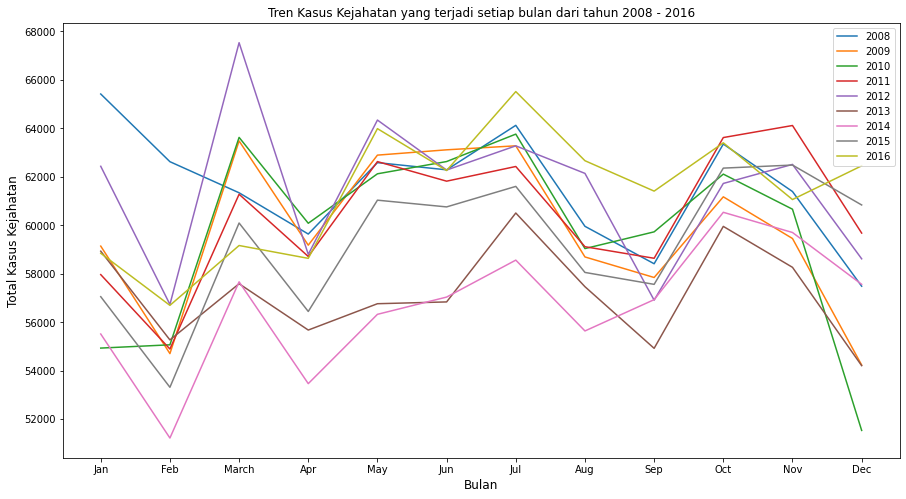

In [93]:
ax = df_crime_year_month[years].plot(figsize=(15,8))
ax.set_xticks(range(0,12))
ax.set_xticklabels(months_name)
ax.legend(loc='upper right')
ax.set_ylabel('Total Kasus Kejahatan', fontsize=12)
ax.set_xlabel('Bulan', fontsize=12)
ax.set_title('Tren Kasus Kejahatan yang terjadi setiap bulan dari tahun 2008 - 2016', fontsize=12)
plt.show()

#### ANALISIS Question 1
- Pada bulan Februari-Maret setiap tahunnya kejahatan cenderung naik, kecuali tahun 2008. Pada bulan April-Mei, Juni-Juli, September-Oktober kejahatan naik pada setiap tahunnya.
- Pada bullan Jan-Feb setiap tahunnya kejahatan cenderung turun, kecuali tahun 2010. Pada bulan Maret-April, Juli-Agustus kejahatan turun setiap tahunnya.
- Degan mengetahui setiap trend kejahatan yang akan naik tiap tahunnya kita bisa memprediksi dengan kemungkinan tinggi bahwa kejahatan akan naik di tahun di atas 2016.
- Kejatahan tertinggi pernah terjadi pada bulan Maret tahun 2012, sedangkan yang terendah pada Bulan Februari 2014.

### Answer Question 2
Bagaimana tren jumlah kasus yang terjadi di London dari tahun 2008 - 2016 untuk seluruh wilayah?

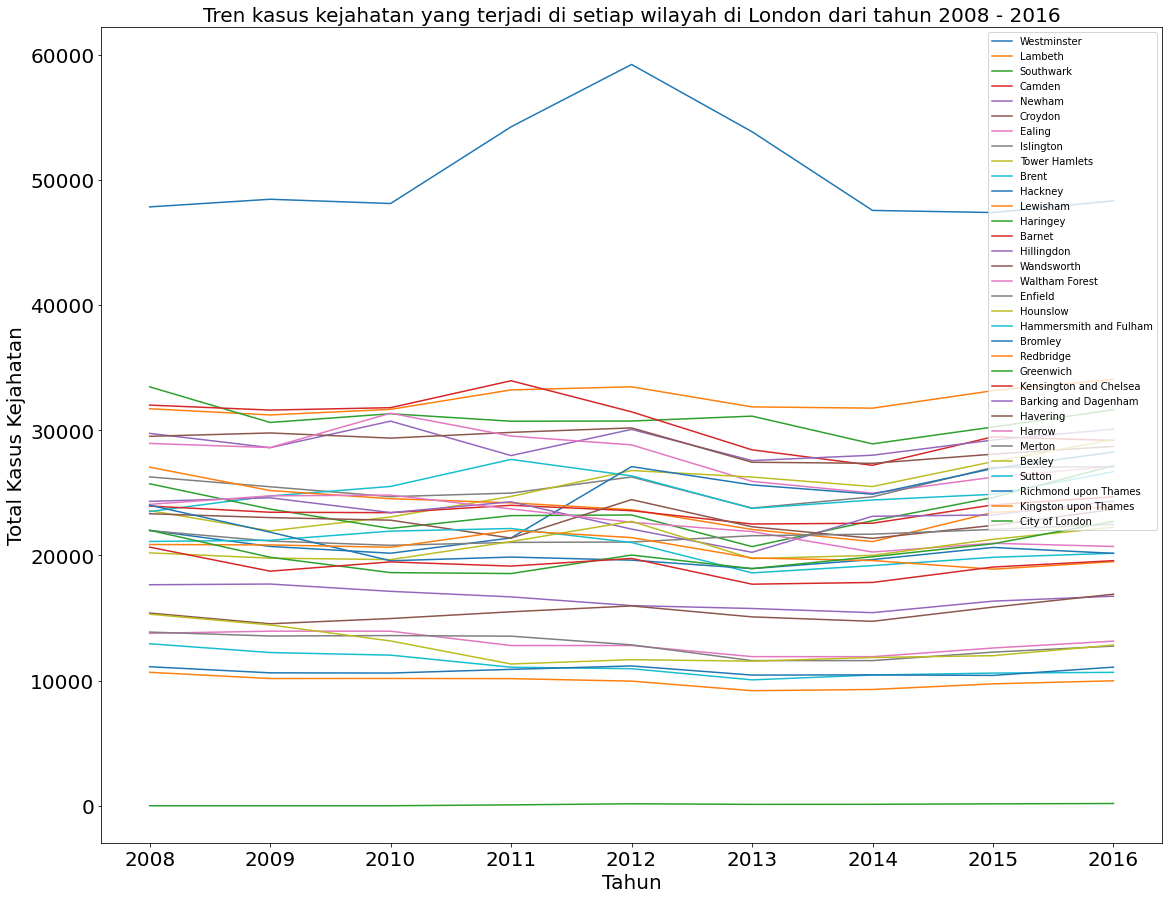

In [94]:
df_crime_boroughs_years[years].transpose().plot(figsize=(19,15))
plt.xlabel('Tahun',fontsize=20)
plt.ylabel('Total Kasus Kejahatan', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Tren kasus kejahatan yang terjadi di setiap wilayah di London dari tahun 2008 - 2016', fontsize=20)
plt.legend(fontsize=10, loc='upper right')
plt.show()

#### ANALISIS Question 2
Dari grafik di atas, terlihat banyak wilayah mengalami peningkatan kejahatan dari 2011 - 2012 dan mengalami penurunan kembali tahun 2012-2013. Hal ini bisa dilihat pada garis total kejahatan semua wilayah dan didukung oleh grafik setiap kota yang mengalami peningkatan kejahatan/penurunan kejahatan.

## Bar Chart

### Answer Question 1
Bagiamana perbandingan 5 wilayah dengan yang total kasus kejahatannya paling rendah dari tahun 2008 - 2016?

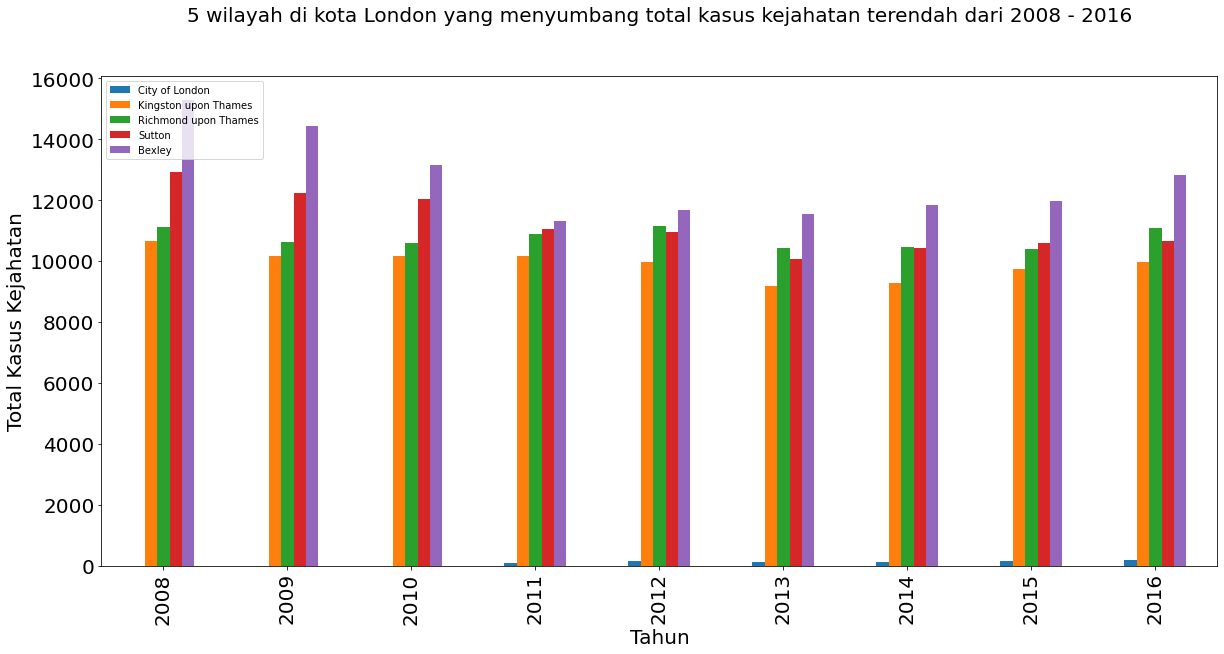

In [98]:
df_crime_boroughs_years.sort_values(by='Total')[years].head().transpose().plot(figsize=(20, 9), kind='bar')
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Tahun',fontsize=20)
plt.ylabel('Total Kasus Kejahatan', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('5 wilayah di kota London yang menyumbang total kasus kejahatan terendah dari 2008 - 2016', fontsize=20, y=1.1)
plt.show()

#### ANALISIS Question 1
Wilayah City of London menjadi wilayah dengan total kasus kejahatan terendah dari tahun 2008 - 2016. Total kasus kejahatannya sangat jauh berbeda dengan empat wilayah lainnya yang masuk menjadi 5 wilayah dengan total kasus kejahatan terendah.

## Area Chart

### Answer Question 1
Bagaimana perbandingan visualisasi dari 5 kejahatan minor yang menyumbang total kasus kejahatan tertinggi di London dari tahun 2008 - 2016?

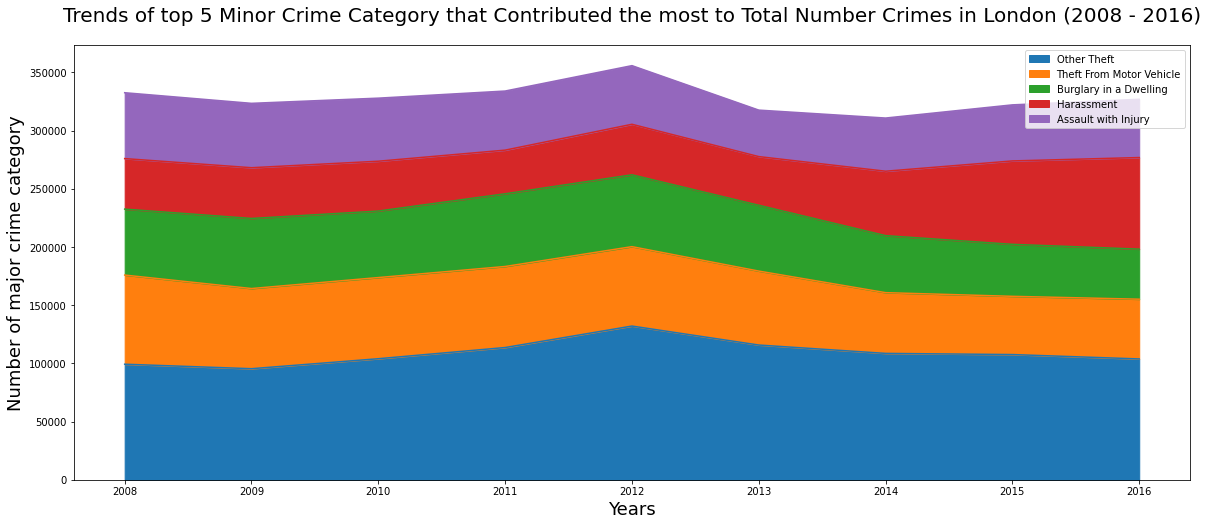

In [142]:
# buat dataframe baru dengan mengambil 5 data teratas yang total kasus kejahatannya tertinggi lalu transpose
df_area = df_crime_minorcat_years[:5][years].transpose()
df_area.plot(
    kind='area',
    stacked=True,
    figsize=(20,8)
)
plt.title('Trends of top 5 Minor Crime Category that Contributed the most to Total Number Crimes in London (2008 - 2016)', fontsize=20, y=1.04)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of major crime category', fontsize=18)
plt.legend(loc='upper right', fontsize=10)
plt.show()


#### ANALISIS Question 1
Grafik area di atas menunjukkan 5 kategori kejahatan minor dengan total kasus kejahatan tertinggi yang terjadi di London dari tahun 2008 - 2016.

1. Kita bisa melihat bahwa akumulasi kelima kategori kejahatan minor ini cenderung meningkat dari tahun 2008 - 2012. Selain itu, dari tahun 2012 - 2013 cenderung menurun. 
2. Dari kelima kategori kejahatan mayor tersebut, Other Theft menyumbang paling banyak terhadap total kasus kejahatan yang terjadi di London yang ditandai dengan daerah arsiran yang paling tebal.
3. Kategori Harassment dalam rentang tahun 2014 - 2016 mengalami peningkatan jumlah kasus yang lebih signifikan ditunjukkan dengan adanya ukuran area yang melebar dari sebelumnya.

## Histogram Chart

### Answer Question 1
Bagaimana distribusi frekuensi total kasus kejahatan yang terjadi untuk setiap wilayah di kota London pada setiap tahunnya?

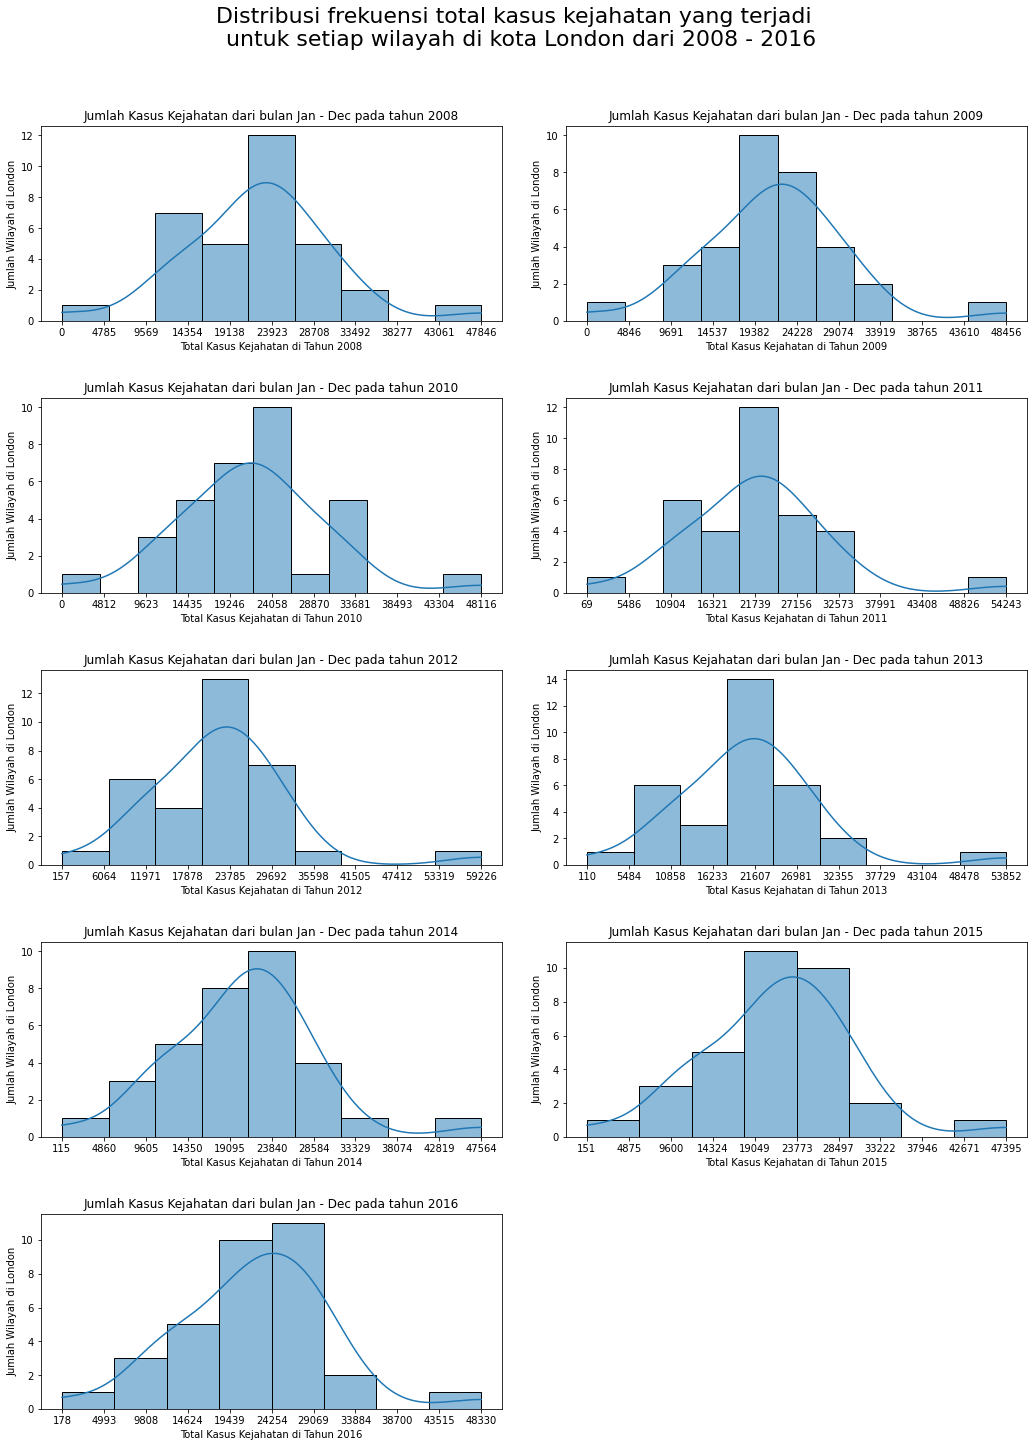

In [100]:
n_rows = int(len(years))
n_cols = 2

fig = plt.figure(figsize=(15, 35)) # membuat figure untuk menampung subplot
ax_s = [] #menampung ax untuk setiap subplot

plot_number = 1 #inisialisasi plot number dari 1

for tahun in years:
    # hitung bin_edges dari setiap kategori 
    count, bin_edges = np.histogram(df_crime_boroughs_years[years][tahun])
    
    # subplot histogram
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    sns.histplot(df_crime_boroughs_years[years][tahun],kde=True, ax=ax_s[plot_number-1])
    ax_s[plot_number -
         1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Dec pada tahun '+str(tahun))
    ax_s[plot_number-1].set(xlabel = "Total Kasus Kejahatan di Tahun "+str(tahun), ylabel = "Jumlah Wilayah di London")
    
    # mengatur nilai pada sumbu x dengan masing-masing bin_edges
    ax_s[plot_number-1].set_xticks(bin_edges)
    
    #increment plot_number setiap looping years
    plot_number += 1

fig.suptitle("Distribusi frekuensi total kasus kejahatan yang terjadi \n untuk setiap wilayah di kota London dari 2008 - 2016", y=1, fontsize=22)
fig.tight_layout(pad=3.0)  # giving padding between plot in subplot
plt.show()

#### ANALISIS Question 1
- Mayoritas grafik histogram yang ditampilkan menyerupai distribusi normal.
- Semua grafik tidak ada yang bimodal atau modus ganda.
- Dari tahun 2008 - 2016 memiliki rata-rata mayoritas total kasus kejahatan pada kisaran sekitar 20.000an - 30.000an kejadian
- Terdapat nilai ekstrim yang ada pada histogram ini, seperti ada wilayah dengan total kasus kejahatan yang relatif sangat kecil dari biasanya yaitu pada kisaran 0 - 4.785 kejadian dan ada wilayah dengan total kasus kejahatan yang relatif sangat besar dari biasanya yaitu pada kisaran 43.061 - 47.46 kejadian pada tahun 2008

## Box Plot

### Answer Question 1
Bagaimana rata-rata dan outliers dari total kasus kejahatan yang terjadi untuk setiap wilayah di kota London pada setiap tahunnya?

In [106]:
df_crime_boroughs_years[years]

,2008,2009,2010,2011,2012,2013,2014,2015,2016
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127
Islington,26273,25485,24693,24980,26268,23784,24679,27032,27092
Tower Hamlets,23578,21959,23072,24712,26784,26258,25504,27493,29253
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693


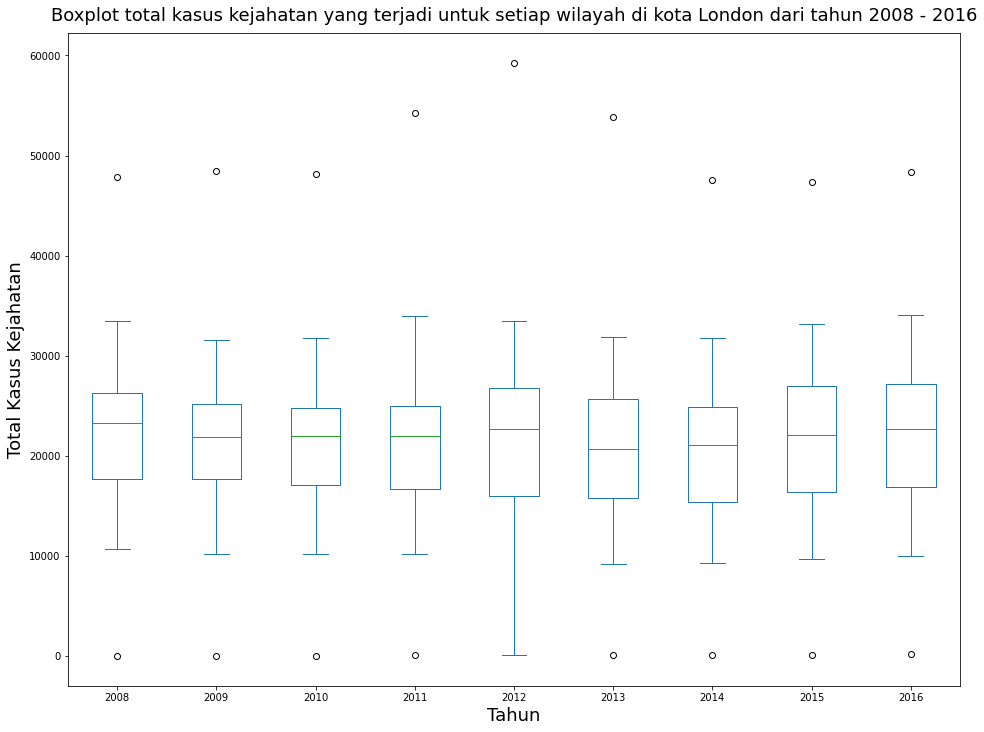

In [138]:
df_crime_boroughs_years[years].plot(
    kind='box',
    figsize=(16,12),
)
plt.xlabel('Tahun', fontsize=18)
plt.ylabel('Total Kasus Kejahatan', fontsize=18)
plt.title('Boxplot total kasus kejahatan yang terjadi untuk setiap wilayah di kota London dari tahun 2008 - 2016',  fontsize=18, y=1.01)
plt.show()

#### ANALISIS Question 1
Ada beberapa hal yang bisa dianalisis dari grafik boxplot di atas.

1. Setiap tahunnya rata-rata total kasus kejahatan yang terjadi untuk setiap wilayah berada dalam kisaran sekitar 20 ribu - 30 ribu kejadian yang ditampilkan oleh garis warna hijau box.
2. Melalui boxplot ini juga akan mengonfirmasi adanya total kasus kejahatan dengan nilai yang ekstrim. Nilai esktrim ini ditemukan dari rentang tahun 2008 - 2016. Wilayah City of London menjadi wilayah yang relatif tentram dengan total kasus kejahatan setiap tahunnya berada kurang dari (Q1 - 1.5x(Q3-Q1)), sehingga pada boxplot muncul sebagai outliers (ditandai dengan simbol lingkaran).
2. Wilayah Westminster menjadi wilayah yang kriminalitasnya relatif tinggi dengan total kasus kejahatan setiap tahunnya berada lebih dari (Q3 + 1.5x(Q3-Q1)), sehingga pada boxplot muncul sebagai outliers

## Pie Chart

### Answer Question 1
Bagaimana persentase kejahatan minor yang terjadi dari tahun 2008 - 2016? Apa 3 kejahatan minor yang menyumbang total kasus kejahatan tertinggi pada rentang tahun tersebut?

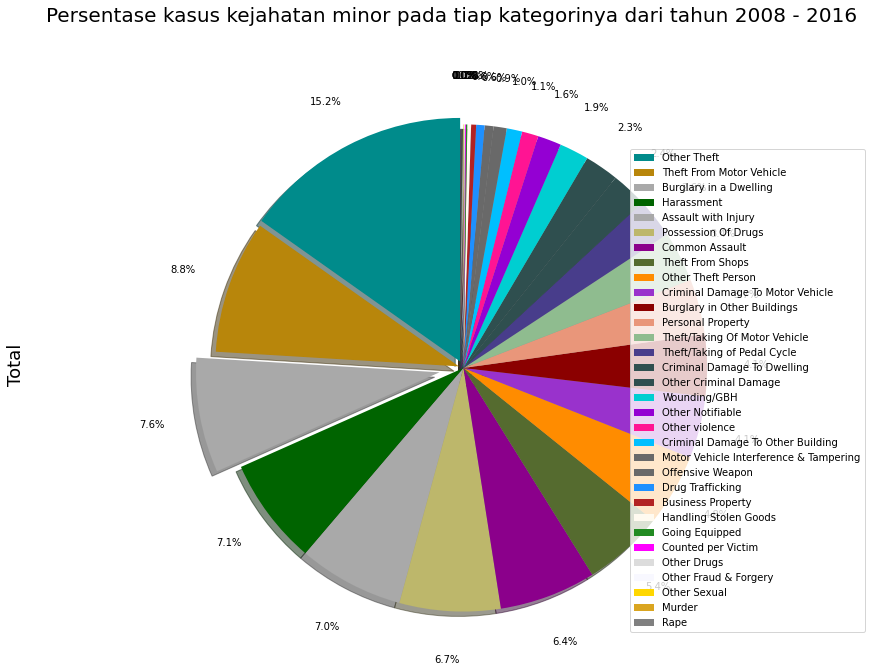

In [140]:
# ratio for each category crime with which to offset each wedge.
explode_list = [0.03, 0.02, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
df_pie = df_crime_minorcat_years['Total']
df_pie.plot(kind='pie',
            figsize=(15, 10),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,         # turn off labels on pie chart
            pctdistance=1.2,# the ratio between the center of each pie slice and the start of the text generated by autopct
            colors=colors_list,  # add custom colors
            explode=explode_list  # 'explode' top 3 major_category
            )

# scale the title up by 12% to match pctdistance
plt.title('Persentase kasus kejahatan minor pada tiap kategorinya dari tahun 2008 - 2016', y=1.12, fontsize=20)
plt.ylabel('Total',fontsize=18)
plt.axis('equal')

# add legend
plt.legend(labels=df_pie.index.values, loc='lower right', bbox_to_anchor=(1, 0))

plt.show()

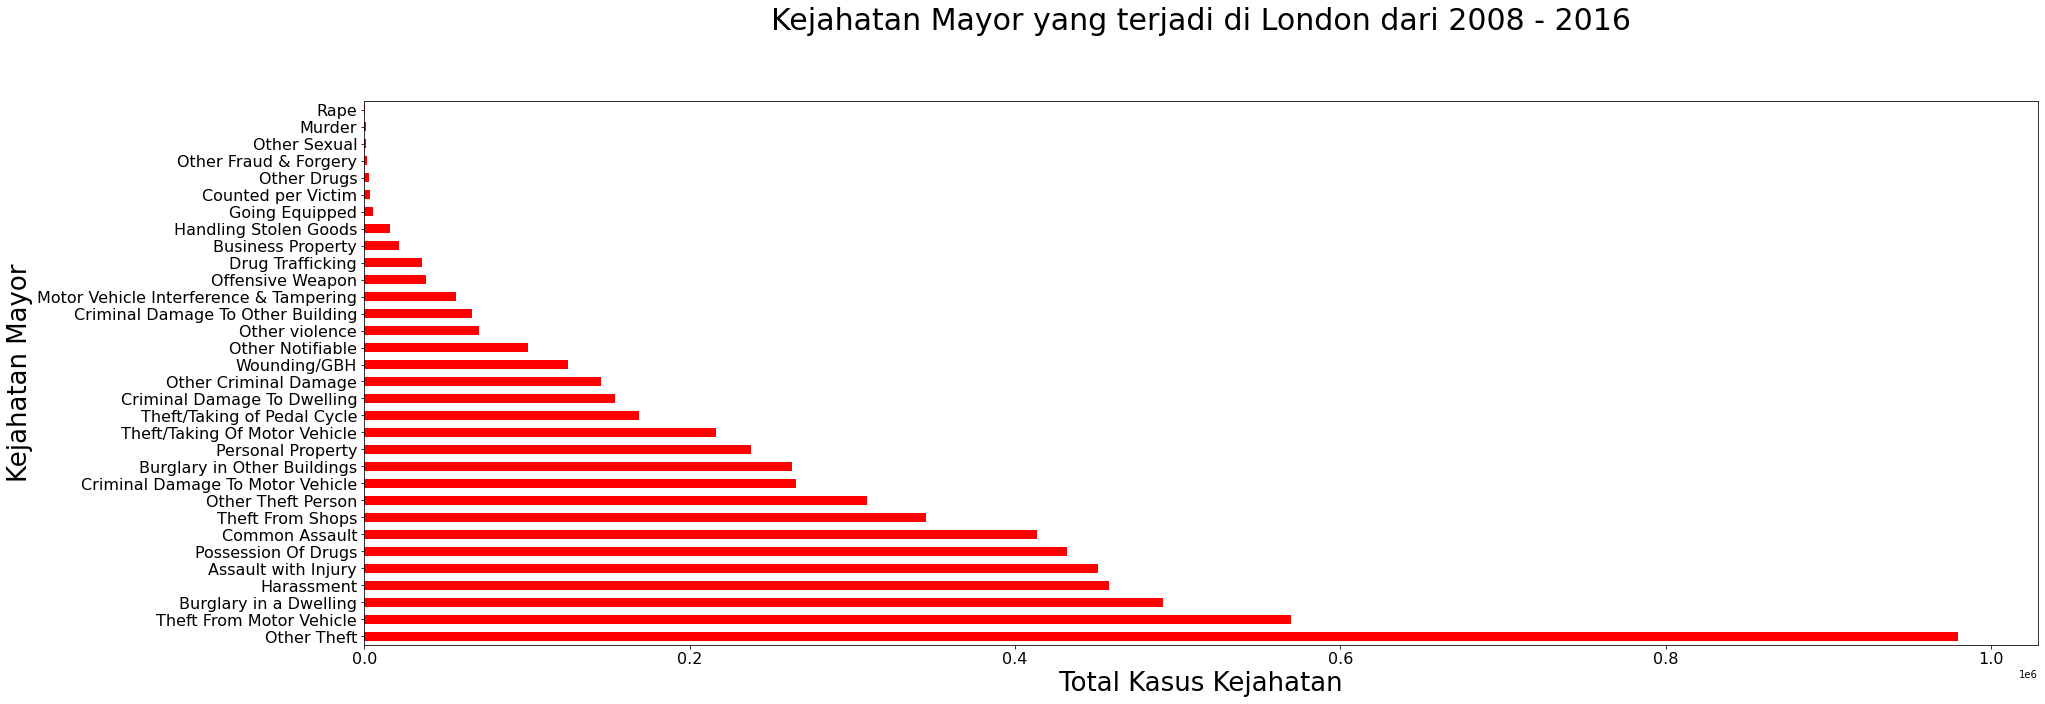

In [119]:
df_crime_minorcat_years['Total'].plot(
    kind='barh', 
    figsize=(30,10),
    color='red'
)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Kejahatan Mayor yang terjadi di London dari 2008 - 2016', fontsize=30, y=1.12)
plt.xlabel('Total Kasus Kejahatan', fontsize=26)
plt.ylabel('Kejahatan Mayor', fontsize=26)
plt.show()

In [131]:
# mengecek isi dari Other violence di Kejahatan Mayor
minorY = df_loa_sample[
        df_loa_sample['Kejahatan Minor'] == "Other Theft"
    ]

minorY['Kejahatan Mayor'].unique()

array(['Theft and Handling'], dtype=object)

#### ANALISIS Question 1
Other Theft sebesar 15,2% dengan total kasus kejahatan 980.085. Other Theft dalam kategori kejahatan mayor adalah Theft dan Handling.
Theft from Motor Vehicle sebesar 8,8% dengan total kasus kejahatan 569.956
Burglary in Dwelling sebesar 7,6% dengan total kasus kejahatan 491.282

## Scater Plot

### Answer Question 1
Bagaimana hubungan antara kasus kejahatan yang terjadi pada setiap bulan dari tahun 2008 - 2016?
Bagaimana tren total kasus kejahatan yang terjadi dari tahun ke tahun (2008 - 2016)?

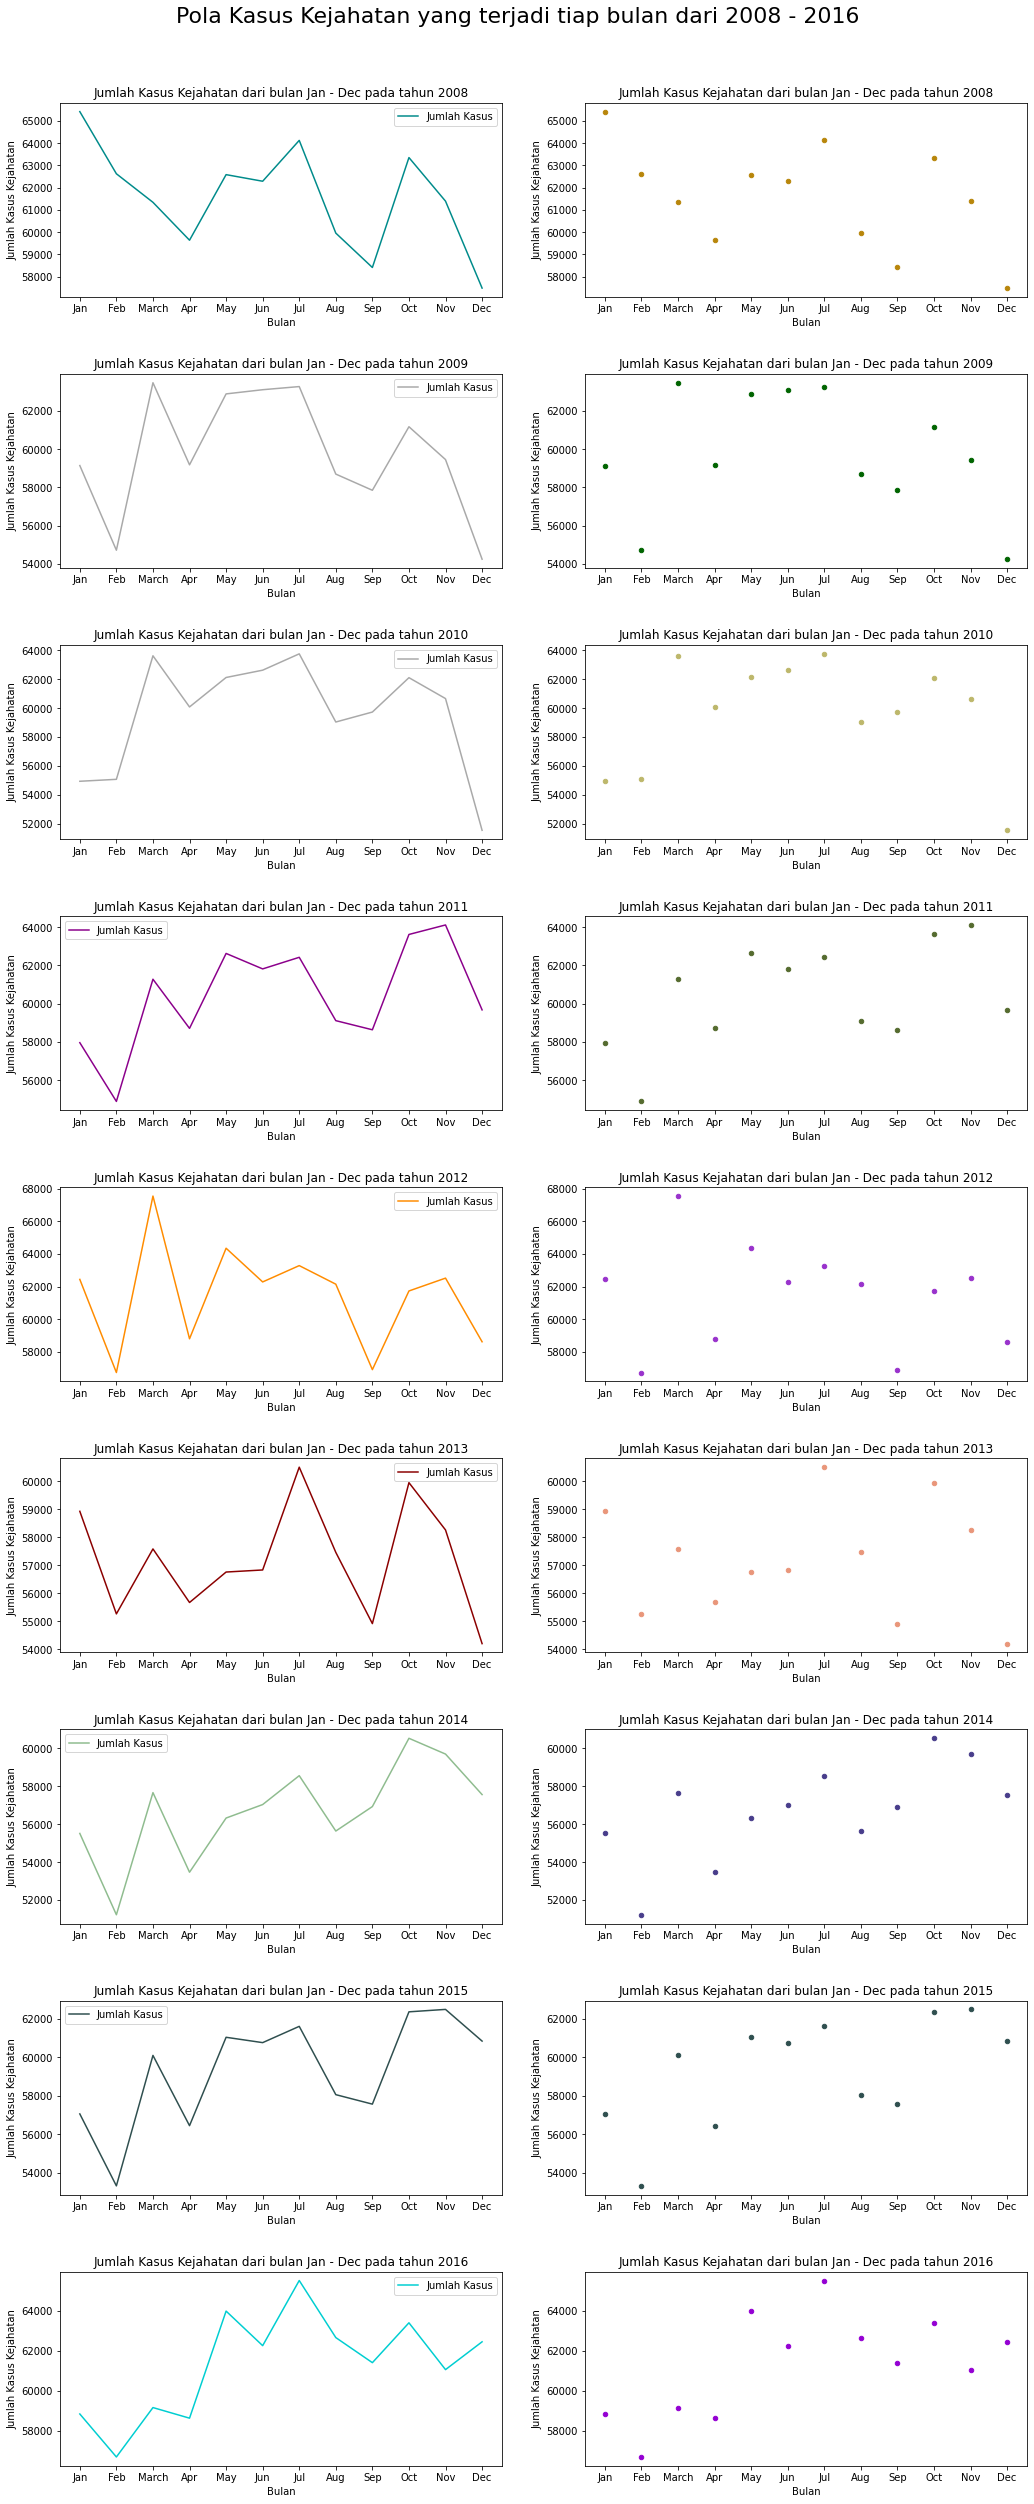

In [104]:
n_rows = int(len(years))
n_cols = 2

fig = plt.figure(figsize=(15, 35)) # membuat figure untuk menampung subplot
ax_s = [] #menampung ax untuk setiap subplot

plot_number = 1 #inisialisasi plot_number subplot dari 1

for tahun in years:
    #subplot line plot
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    
    #ambil data pada tahun tertentu, group berdasarkan bulan lalu sum 'Jumlah Kasus'-nya
    df = df_loa_sample[
        (df_loa_sample['Tahun'] == tahun)
    ][['Bulan', 'Jumlah Kasus']].groupby('Bulan').sum()
    
    #plotting
    df.plot(
        kind='line',
        ax=ax_s[plot_number-1],
        color=colors_list[plot_number-1]
    )
    ax_s[plot_number -
         1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Dec pada tahun '+str(tahun))
    ax_s[plot_number-1].set_xlabel('Bulan')
    ax_s[plot_number-1].set_ylabel('Jumlah Kasus Kejahatan')
    ax_s[plot_number-1].set_xticks(months)
    ax_s[plot_number-1].set_xticklabels(months_name)
    plot_number += 1
    
    # subplot scatter plot
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    df.reset_index(inplace=True)
    df.columns = ['Bulan', 'Jumlah Kasus']
    df.plot(
        kind='scatter',
        x='Bulan',
        y='Jumlah Kasus',
        ax=ax_s[plot_number-1],
        color=colors_list[plot_number-1]
    )
    ax_s[plot_number -
         1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Dec pada tahun '+str(tahun))
    ax_s[plot_number-1].set_xlabel('Bulan')
    ax_s[plot_number-1].set_ylabel('Jumlah Kasus Kejahatan')
    # mengubah index dan labels pada sumbu x agar diganti menjadi nama bulan
    ax_s[plot_number-1].set_xticks(months)
    ax_s[plot_number-1].set_xticklabels(months_name)
    
    #increment plot_number in each itteration
    plot_number += 1

fig.suptitle("Pola Kasus Kejahatan yang terjadi tiap bulan dari 2008 - 2016", y=1, fontsize=22)
fig.tight_layout(pad=3.0)  # giving padding between plot in subplot
plt.show()

#### ANALISIS Question 1 
1. Dari tahun 2008 - 2016, mayoritas kasus kejahatan terjadi penurunan dari bulan Januari - Februari dan terjadi peningkatan dari bulan Februari - Maret.
2. Peningkatannya juga terbilang relatif tinggi dalam rentang tahun 2009 - 2012, 2014 yang rata-rata peningkatannya lebih dari 5000an kasus hanya dalam sebulan.
3. Dalam rentang 1 bulan dari Maret - April, terjadi penurunan pada kasus kejahatan. Penurunannya terbilang relatif tinggi dalam rentang tahun tersebut mulai dari 4000an sampai 8000an penurunan kasus.
4. Dalam rentang April - Oktober kasus kejahatan mengalami fluktuasi kadang naik dan kadang turun.
5. Dalam interval Oktober - Desember kasus kejahatan kembali mengalami penurunan hampir mayoritas di setiap tahun dari tahun 2008 - 2016

## Word Cloud

### Answer Question 1
Tiga kasus yang paling banyak terjadi untuk kategori kejahatan mayor pada tahun 2008!

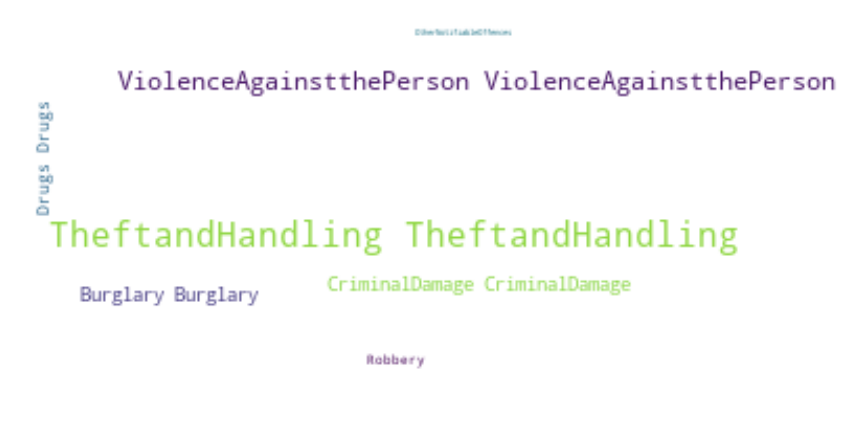

In [137]:
#buat dataframe baru yang mengambil data yang tahunnya 2008, lalu dipilih hanya kolom 'Kejahatan Mayor' dan 'Jumlah Kasus'
df_word_cloud = df_loa_sample[
    df_loa_sample['Tahun']==2008
][['Kejahatan Mayor','Jumlah Kasus']]

# Menghapus spasi yang terdapat pada Kejahatan Mayor
df_word_cloud['Kejahatan Mayor'] = df_word_cloud['Kejahatan Mayor'].apply(lambda x: ''.join(x.split()))

# menjumlahkan total kasus kejahatan berdasarkan "Kejahatan Mayor"
df_word_cloud = df_word_cloud.groupby('Kejahatan Mayor').sum()
df_word_cloud.index.name = None

# hitung sum dari 'Jumlah Kasus'
total_keseluruhan_kasus = df_word_cloud['Jumlah Kasus'].sum()

# mengatur kata maksimum untuk proporsi dalam word cloud
max_words = 100

#inisialisasi string kosong untuk menampung cloning 'Kejahatan Mayor' sebanyak persentasenya
word_string = ''

#lakukan perulangan untuk setiap 'Kejahatan Mayor' yang ada
for crime_cat in df_word_cloud.index.values:
    # lakukan copy string 'Kejahatan Mayor' sebesar proporsinya terhadap keseluruhan kasus
    repeat_num_crime_cat = int(
        df_word_cloud.loc[crime_cat, 'Jumlah Kasus']/float(total_keseluruhan_kasus)*max_words)
    # concat ke word_string sejumlah repeat_num_crime_cat
    word_string = word_string + ((crime_cat + ' ') * repeat_num_crime_cat)

# Instansiasi objek WordCloud dengan warna background putih
crime_category_word_cloud = WordCloud(
    background_color='white'
)
#generate word_string ke dalam objek Word CLoud
crime_category_word_cloud.generate(word_string)

fig = plt.figure() #buat figure
fig.set_figwidth(15) #setting lebar figure
fig.set_figheight(18) #setting tinggi figure

# Display the word cloud
plt.imshow(crime_category_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### ANALISIS Question 1 

Theft and Handling memiliki ukuran tulisan terbesar sebagai kasus yang paling banyak terjadi pada 2008. Dilanjutan dengan Vilence Against the Person, dan Bulagry sebagai kasus kegtiga yang paling besar.

# Overall Analysis

1. Rata-rata total kasus kejahatan yang terjadi untuk seluruh wilayah di London berada dalam kisaran sekitar 20.000an - 30.000an kejadian dalam rentang tahun 2008 - 2016.
2. Dalam rentang tahun 2008 sampai 2016, tindakan kejahatan cenderung meningkat pada bulan Maret dan Oktober, sedangkan pada bulan Februari, September, dan Desember tindakan kejahatan cenderung menurun.
3. Wilayah Westminster menjadi wilayah di London dengan angka kriminalitas tertinggi dan wilayah City of London menjadi wilayah dengan angka kriminalitas terendah dalam rentang tahun 2008 - 2016.
4. Kasus kejahatan Other Theft paling sering terjadi di kejahatan minor, sedangkan kasus kejahatan Rape sangat jarang terjadi di kota London dalam rentang 2008 - 2016.
    